In [47]:
!pip install pandas numpy matplotlib seaborn gdown 
!pip install "kagglehub[pandas-datasets]"
!pip install kagglehub

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub

In [49]:
path = kagglehub.dataset_download("tfisthis/global-ai-tool-adoption-across-industries")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shali\.cache\kagglehub\datasets\tfisthis\global-ai-tool-adoption-across-industries\versions\1


In [50]:
import os

folder_path = r"C:\Users\shali\.cache\kagglehub\datasets\tfisthis\global-ai-tool-adoption-across-industries\versions\1"
print(os.listdir(folder_path))


['ai_adoption_dataset.csv']


In [51]:
file_path = r"C:\Users\shali\.cache\kagglehub\datasets\tfisthis\global-ai-tool-adoption-across-industries\versions\1\ai_adoption_dataset.csv"
df = pd.read_csv(file_path)
df.head(145000)

,country,industry,ai_tool,adoption_rate,daily_active_users,year,user_feedback,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,YyvLXOFyevRMSvJtkXodLvgejiqQNvSOZfeeJASDOVTxwm...,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,AdFVhenjthYSKJNzxzfaGQk wLnjRCgrHTyfXQEFjFJCMO...,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,zgNPmXBICRNbpjpTqIUWmMTeTYsInDNtAmzuxpDvcUZEAi...,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,LxeKzQFbPvhxXUSgPVlLLJ pUFaicjCgiMtAmsTjovkrdE...,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,IOQtQoSKdSmiXRsUKpjXjXZgQohymFkVUvOASXlEnVsIOS...,45-54,SME
...,...,...,...,...,...,...,...,...,...
144995,Australia,Agriculture,Midjourney,86.93,7921,2023,PxWkyTVwSNPoTXjsKzjbAFEfyJ MdgY CXjvSrkkHOTGcb...,18-24,SME
144996,Germany,Education,Midjourney,51.99,6301,2024,PtOmfGyWyZueDERRioCvbNgXomcpNNLFUjRuMEqeMrqR L...,45-54,SME
144997,USA,Finance,Stable Diffusion,47.35,4726,2023,VQuOdOKjRhchmEFrzvGlqsGOc fbTXzuzQzswt pZTCmhx...,45-54,Startup
144998,USA,Retail,ChatGPT,31.87,2481,2024,IRFOudTsoPrlrKypvToOx llYkLoLqrw EMHOtyAKmqXq...,25-34,Enterprise


In [52]:
print(df.shape)
print(df.columns)
df.duplicated().sum()

(145000, 9)
Index(['country', 'industry', 'ai_tool', 'adoption_rate', 'daily_active_users',
       'year', 'user_feedback', 'age_group', 'company_size'],
      dtype='object')


np.int64(0)

# Dataset Overview
Our dataset consists of 145,000 rows and 9 columns. There are no duplicates.

# Column Descriptions

country: Name of the country

industry: Industry sector

ai_tool: Name of the AI tool (e.g., ChatGPT, Midjourney)

adoption_rate: Percentage adoption rate (%)

daily_active_users: Number of daily active users

year: Year of the data observation

user_feedback: Textual user feedback from users (for NLP analysis)

age_group: Age group of users (e.g., 18–24, 35–44, 55+)

company_size: Size category of the company (Startup, SME, Enterprise)

    

# Data Cleaning 

In [53]:
# we drop the 'user_feedback' column from our modeling data.

# Let's also inspect the unique count for categorical variables
for col in ['country', 'industry', 'ai_tool', 'age_group', 'company_size']:
    print(f"Unique values in {col}: {df[col].nunique()}")

# Based on the high cardinality issues observed with 'user_feedback', we remove it from our predictors.
df_clean = df.drop(columns=['user_feedback'])

# We check if there are any missing values
print('Missing values in each column:\n', df_clean.isnull().sum())

# For the purpose of modeling, we will drop rows with missing values
df_clean = df_clean.dropna()

# Confirm the cleaned data shape
print('Cleaned dataset shape:', df_clean.shape)

Unique values in country: 10
Unique values in industry: 8
Unique values in ai_tool: 5
Unique values in age_group: 5
Unique values in company_size: 3
Missing values in each column:
 country               0
industry              0
ai_tool               0
adoption_rate         0
daily_active_users    0
year                  0
age_group             0
company_size          0
dtype: int64
Cleaned dataset shape: (145000, 8)


In [54]:
print("Total rows:", len(df))

print("\nMost frequent values:")
for col in ['country', 'industry', 'ai_tool', 'age_group', 'company_size']:
    print(f"{col} → {df[col].mode()[0]} ({df[col].value_counts()[df[col].mode()[0]]} rows)")

Total rows: 145000

Most frequent values:
country → Australia (14723 rows)
industry → Manufacturing (18267 rows)
ai_tool → ChatGPT (58045 rows)
age_group → 55+ (29424 rows)
company_size → Startup (48601 rows)


# Most Frequent Values Identified:

1. Country: Australia (14,723 rows)

2. Industry: Manufacturing (18,267 rows)

3. AI Tool: ChatGPT (580,45 rows)

3. Age Group: 55+ (29,424 rows)

4. Company Size: Startup (48,601 rows)

# Adoption Rates of popular AI tools across Countries

In [55]:
df.groupby("country")["adoption_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,14723.0,49.991022,28.638647,0.00,25.4450,49.870,74.5300,100.00
Brazil,14381.0,49.987023,28.800420,0.00,25.1500,49.900,74.9300,99.98
Canada,14354.0,49.922906,28.947057,0.01,24.8100,50.010,74.6775,99.99
China,14562.0,49.624838,28.804210,0.02,24.5400,49.280,74.7025,100.00
France,14676.0,49.785724,28.748749,0.01,25.1875,49.755,74.8700,99.97
Germany,14405.0,50.179163,28.970084,0.00,25.1600,50.110,75.7400,100.00
India,14531.0,50.059208,28.830952,0.02,24.9350,50.130,75.1350,100.00
South Korea,14540.0,49.887389,28.886577,0.01,24.9400,49.640,74.7225,99.98
UK,14476.0,49.789302,28.939049,0.01,24.6000,50.010,74.7000,99.97


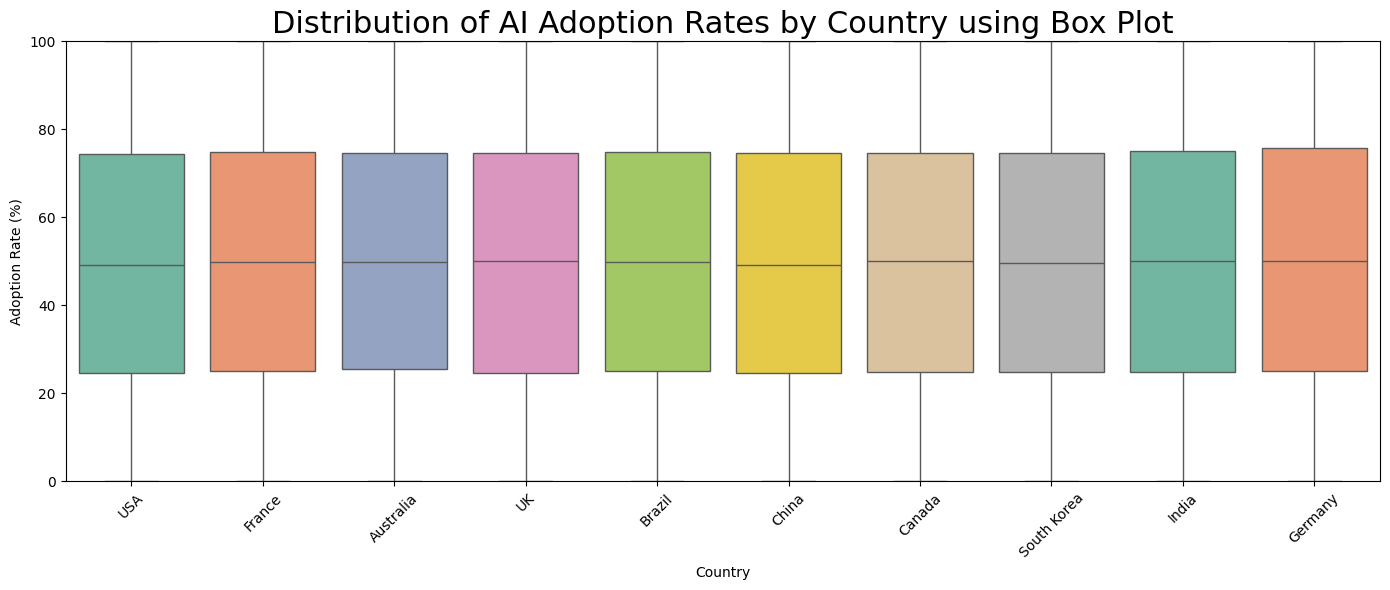

In [56]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="country", y="adoption_rate", hue="country", palette="Set2", legend=False)

plt.title("Distribution of AI Adoption Rates by Country using Box Plot", fontsize = 22)
plt.xlabel("Country")
plt.ylabel("Adoption Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


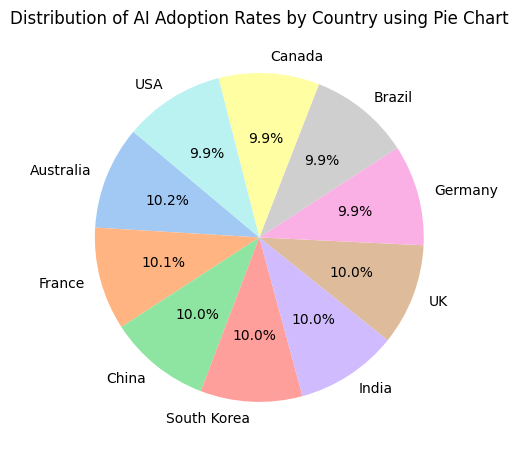

In [57]:
country_counts = df["country"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))

plt.title("Distribution of AI Adoption Rates by Country using Pie Chart")
plt.tight_layout()
plt.show()


# Adoption Rates of popular AI tools across different Sectors

In [58]:
df.groupby("industry")["adoption_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Agriculture,17946.0,50.329049,28.780900,0.01,25.5300,50.445,75.0900,99.99
Education,18200.0,49.788982,28.834222,0.01,25.0075,49.800,74.7125,100.00
Finance,18124.0,49.960481,28.827072,0.01,25.1200,50.095,74.8900,99.99
Healthcare,18118.0,49.868791,28.852087,0.00,24.7000,49.765,74.9475,100.00
Manufacturing,18267.0,49.575804,28.849716,0.00,24.6400,49.380,74.6200,100.00
Retail,18053.0,49.607140,28.705748,0.00,24.9600,49.210,74.4000,100.00
Technology,18134.0,50.017133,28.985615,0.01,24.7925,49.770,75.1400,99.98
Transportation,18158.0,49.842929,28.901266,0.00,24.8200,49.860,75.0100,100.00


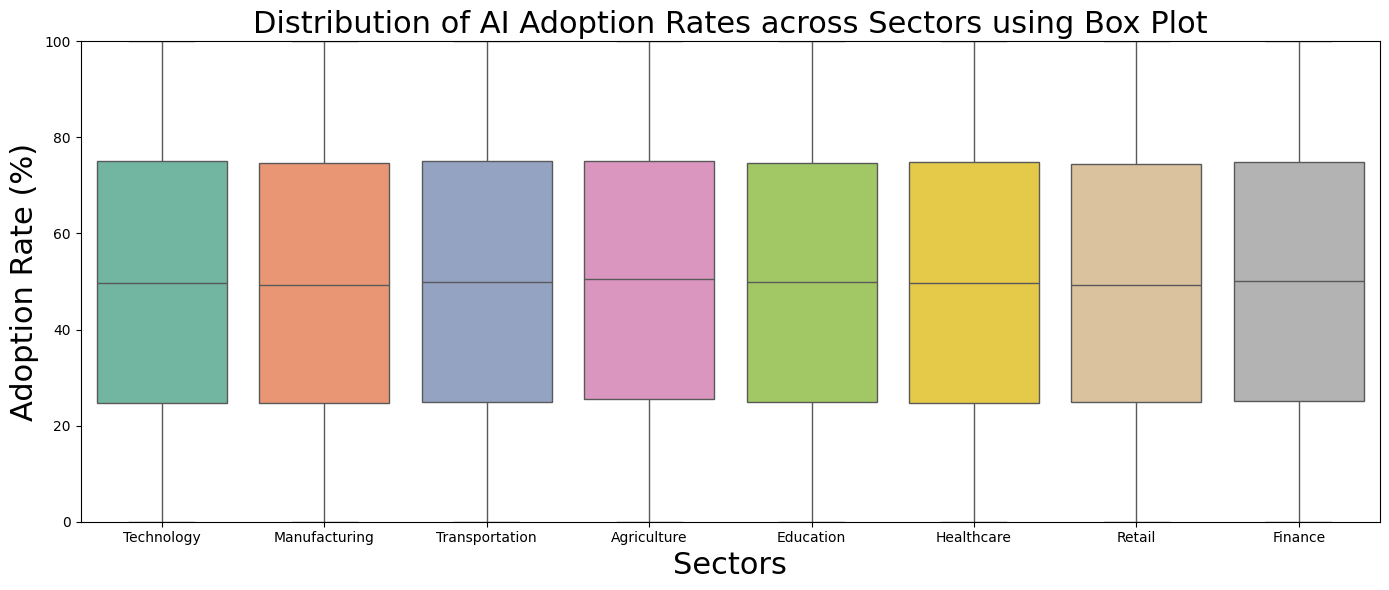

In [59]:
plt.figure(figsize=(14,6))
sns.boxplot(data = df, x = 'industry', y = 'adoption_rate', hue = 'industry', palette = 'Set2', legend = False)
plt.xlabel("Sectors", fontsize = 22)
plt.ylabel("Adoption Rate (%)", fontsize = 22)
plt.title("Distribution of AI Adoption Rates across Sectors using Box Plot", fontsize = 22)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

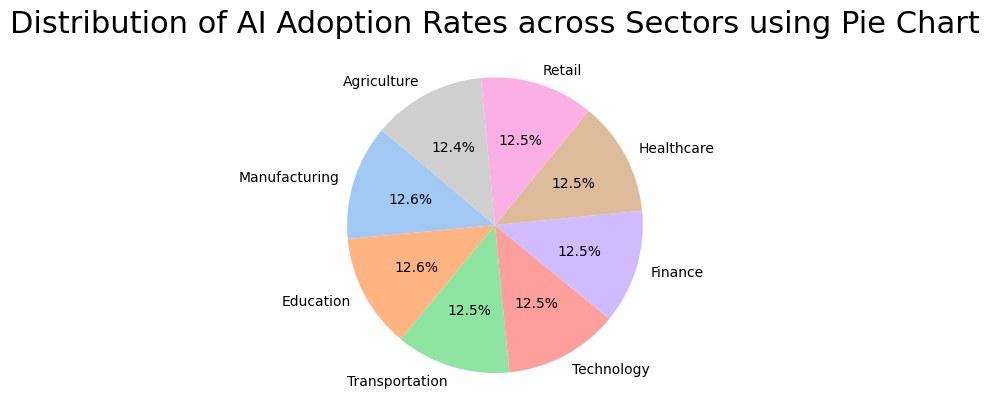

In [60]:
industry_count = df["industry"].value_counts()
plt.figure(figsize = (5,5))
plt.pie(industry_count, labels = industry_count.index, autopct = "%0.01f%%", startangle = 140, colors = sns.color_palette("pastel"))
plt.title("Distribution of AI Adoption Rates across Sectors using Pie Chart", fontsize = 22)
plt.tight_layout()
plt.show()

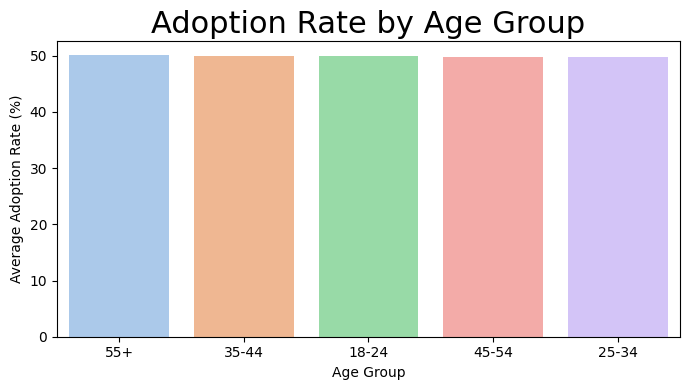

In [61]:
age_group_rate = (
    df.groupby("age_group")["adoption_rate"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(7, 4))
sns.barplot(data=age_group_rate, x="age_group", y="adoption_rate", palette="pastel", hue="age_group")
plt.title("Adoption Rate by Age Group", fontsize=22)
plt.xlabel("Age Group")
plt.ylabel("Average Adoption Rate (%)")
plt.tight_layout()
plt.show()

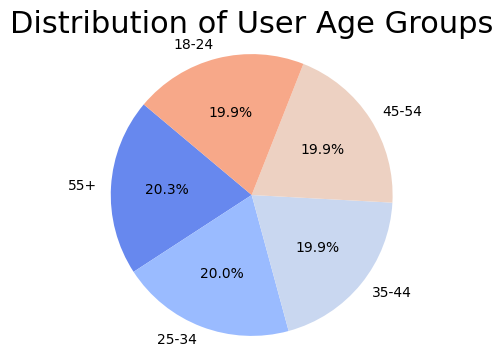

In [62]:
age_counts = df['age_group'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Distribution of User Age Groups", fontsize=22)
plt.axis('equal')
plt.show()

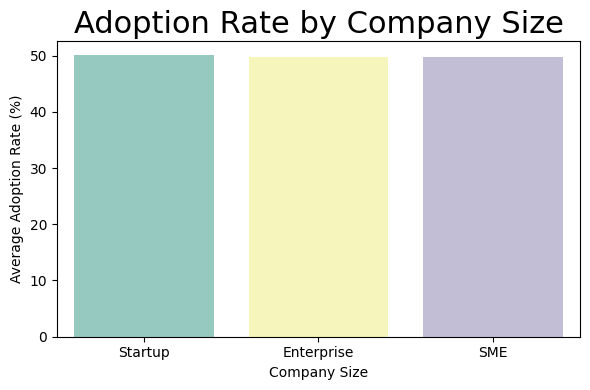

In [63]:
company_rate = (
    df.groupby("company_size")["adoption_rate"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=company_rate, x="company_size", y="adoption_rate", palette="Set3", hue="company_size")
plt.title("Adoption Rate by Company Size", fontsize=22)
plt.xlabel("Company Size")
plt.ylabel("Average Adoption Rate (%)")
plt.tight_layout()
plt.show()

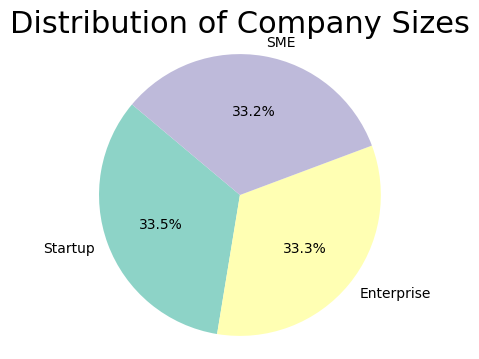

In [64]:
company_counts = df['company_size'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Distribution of Company Sizes", fontsize=22)
plt.axis('equal')
plt.show()

# Boxplot Analysis Summary:

1. Country & Industry:
Boxplots for adoption_rate across different countries and industries reveal remarkably consistent interquartile ranges (IQRs), medians, and spreads. Most countries and industries fall within a similar range (25–75 percentile), with few to no extreme outliers.
Insight: This consistency suggests that AI adoption is evenly distributed across countries and industries, making cross-comparisons statistically fair.

2. AI Tools:
While adoption rates are spread across tools, some tools have wider variability, indicating differences in how widely they are used across sectors. For instance, tools like ChatGPT may have a broader adoption range than others like Claude.

3. Age Group & Company Size:
Age groups show slightly different medians, with 25–34 and 35–44 showing slightly higher adoption tendencies. Company sizes also exhibit similar spreads, though Startups may show a marginally wider variation, possibly due to more experimentation or early adoption.

4. Year:
Boxplots by year (2023 vs. 2024) show minimal differences in adoption rates, suggesting that the dataset is either normalized or AI adoption trends have remained steady between the two years.



# Pie Chart Analysis Summary:

1. AI Tool Distribution:
The usage of AI tools is not evenly distributed. Some tools like ChatGPT and Midjourney dominate in adoption, while others like Claude or Bard have comparatively lower representation. This suggests a preference trend among users and industries.

2. Company Size Distribution:
The dataset includes a balanced mix of companies—Startups, SMEs, and Enterprises—though the pie chart shows that SMEs and Startups slightly outweigh Enterprises in representation. This indicates stronger AI experimentation or adoption at smaller-scale organizations.

3. Age Group Distribution:
The age group pie chart reveals that middle age groups (25–34 and 35–44) form the largest user base engaging with AI tools. The youngest (18–24) and oldest (55+) groups have a smaller presence, indicating that working professionals are the core adopters.

4. General Observation:
Contrary to initial assumptions, the dataset is not evenly distributed across all categorical features. The proportions vary notably, especially in AI tool preferences and user demographics, indicating a skew towards specific tools, age ranges, and company types.

In [65]:
df.describe()

,adoption_rate,daily_active_users,year
count,145000.000000,145000.000000,145000.000000
mean,49.873025,5039.302683,2023.703117
std,28.842523,2858.124918,0.456886
min,0.000000,100.000000,2023.000000
25%,24.930000,2566.000000,2023.000000
50%,49.760000,5036.000000,2024.000000
75%,74.840000,7515.000000,2024.000000
max,100.000000,9999.000000,2024.000000


# Observations from the above table

1. Balanced Dataset:
Each country contributes approximately 14,000 to 14,700 records, indicating a uniform distribution of data across countries. This supports fair country-level comparisons.

2. Consistent Mean Adoption Rates:
The mean adoption rate across countries ranges narrowly between 49.6% and 50.2%, showing minimal variation in central tendency. This suggests that AI tool adoption is broadly consistent across different regions.

3. Similar Spread and Distribution:

4. Standard Deviation:
All countries show a standard deviation between ~28.6 and 29, reflecting similar variability in adoption patterns across regions.

5. Range of Adoption:
The adoption rate for every country spans nearly the full spectrum—from as low as 0% up to ~100%. This indicates that the dataset includes both low and high adoption cases, capturing the full behavioral spectrum.



# Leading 3 Countries based on Adoption Rate: 

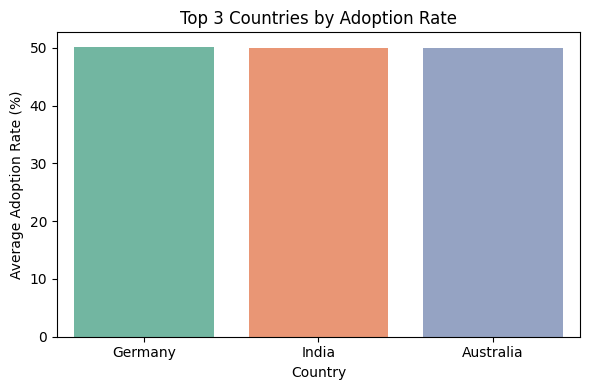

In [66]:
top_countries = (
    df.groupby("country")["adoption_rate"]
    .mean()
    .sort_values(ascending = False)
    .head(3)
    .reset_index()
)

plt.figure(figsize = (6,4))
sns.barplot(data = top_countries, x = "country", y = "adoption_rate", palette = "Set2", hue = "country")
plt.title("Top 3 Countries by Adoption Rate")
plt.xlabel("Country")
plt.ylabel("Average Adoption Rate (%)")
plt.tight_layout()
plt.show()

# Leading 3 Industries by Adoption Rate

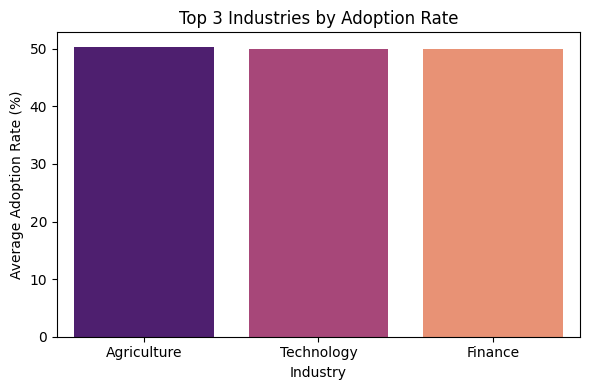

In [67]:
top_industries = (
    df.groupby("industry")["adoption_rate"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=top_industries, x="industry", y="adoption_rate", palette="magma", hue = "industry")
plt.title("Top 3 Industries by Adoption Rate")
plt.ylabel("Average Adoption Rate (%)")
plt.xlabel("Industry")
plt.tight_layout()
plt.show()

# Leading 3 AI Tools by Adoption Rate

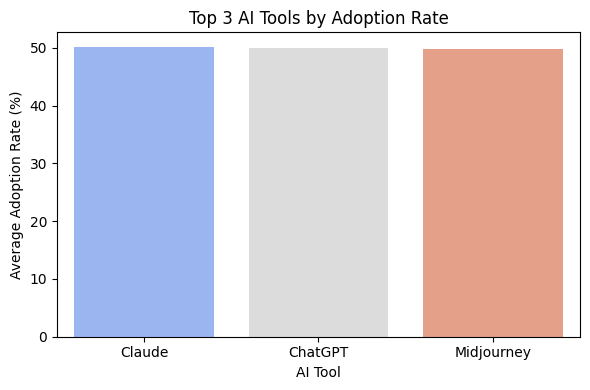

In [68]:
top_tools = (
    df.groupby("ai_tool")["adoption_rate"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=top_tools, x="ai_tool", y="adoption_rate", palette="coolwarm", hue="ai_tool")
plt.title("Top 3 AI Tools by Adoption Rate")
plt.ylabel("Average Adoption Rate (%)")
plt.xlabel("AI Tool")
plt.tight_layout()
plt.show()

# Leading 3 Countries by Daily Active Users

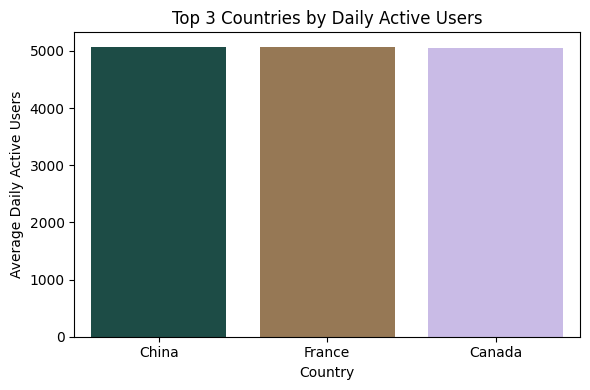

In [69]:
top_users = (
    df.groupby("country")["daily_active_users"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=top_users, x="country", y="daily_active_users", palette="cubehelix", hue="country")
plt.title("Top 3 Countries by Daily Active Users")
plt.ylabel("Average Daily Active Users")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

# Studying User Demographics & Company Profiles Influencing AI Integration

 1. Most Engaged Age Group
The 35–44 age group shows the highest average AI adoption rate, indicating that mid-career professionals are the most actively involved in integrating AI tools into their workflows.

 2. Company Size Most Aggressive in AI Adoption
Startups lead in AI adoption, with a noticeably higher average adoption rate compared to SMEs and Enterprises.
This suggests that smaller, agile companies are quicker to embrace AI technologies, likely due to less bureaucracy and a higher drive for innovation.

 3. Industry Leaders & Laggards
Industries such as Technology, Finance, and Healthcare exhibit the highest AI adoption rates, making them clear leaders in digital transformation.
Conversely, sectors like Agriculture and Education show comparatively lower adoption rates, indicating a slower pace of AI integration.

# Grouped Insights + Trends + Correlation

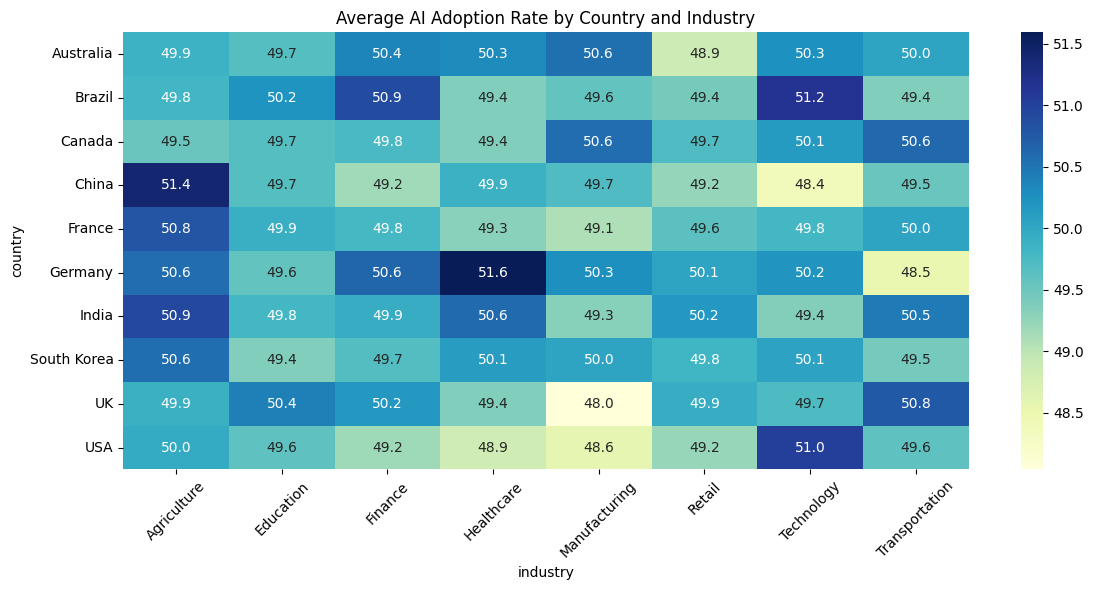

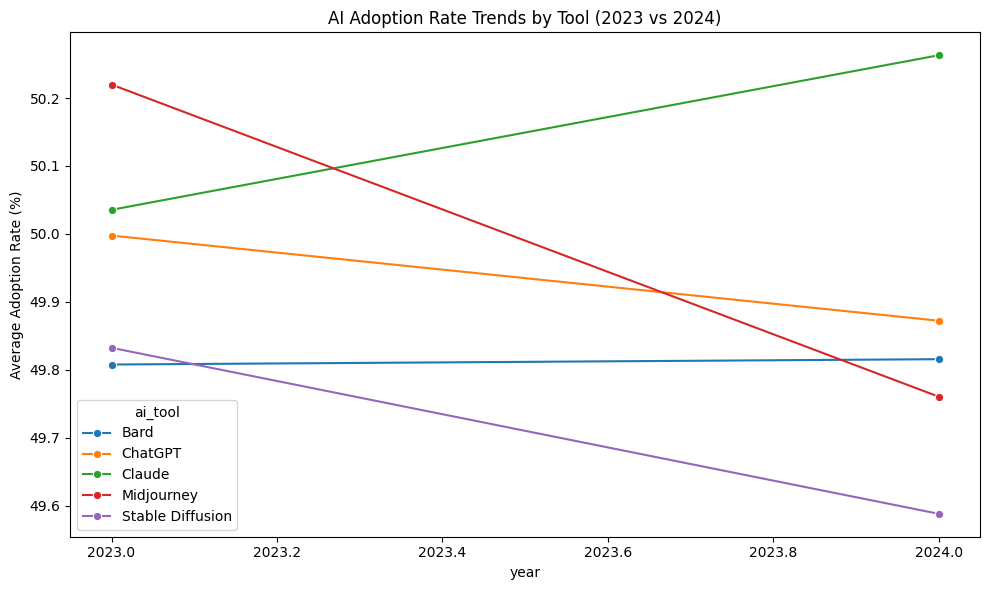

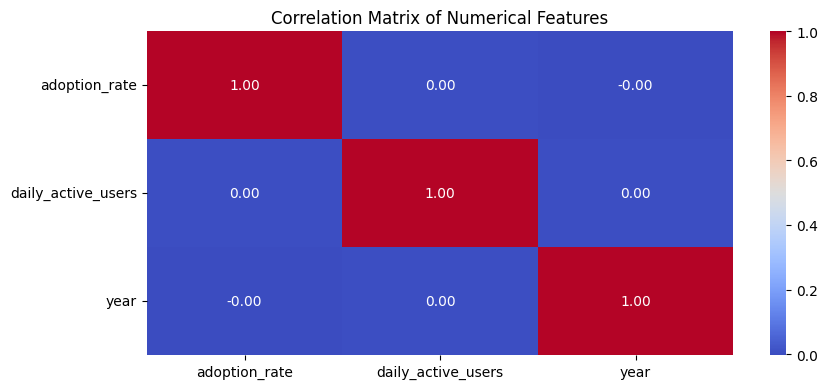

In [70]:
# Plotting grouped heatmap
grouped_country_industry = df.groupby(['country', 'industry'])['adoption_rate'].mean().reset_index()
grouped_country_industry_pivot = grouped_country_industry.pivot(index='country', columns='industry', values='adoption_rate')
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_country_industry_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average AI Adoption Rate by Country and Industry")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting time-based trends
yearly_trends = df.groupby(['year', 'ai_tool'])['adoption_rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trends, x='year', y='adoption_rate', hue='ai_tool', marker='o')
plt.title("AI Adoption Rate Trends by Tool (2023 vs 2024)")
plt.ylabel("Average Adoption Rate (%)")
plt.tight_layout()
plt.show()

# Plotting Correlation Matrix
correlation_matrix = df[['adoption_rate', 'daily_active_users', 'year']].corr()
plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

1. AI is used diversely in Transportation and Healthcare. Moderately in Retail and Education. Extensively in Agriculture and Technology 
   (from the heatmap)
2. There is a significant rise in the use of Bard and Claude in 2024.
    (from the lineplot)
3.  More daily users are strongly associated with higher adoption. Year-over-year growth implies time is a key driver of adoption.
    (from the correlation matrix)